<h1>Sentimental Analysis on Emirates Airlines Trustpilot Reviews<h1>
    <h4>Processing the reviews from Trustpilot on the Emirates Airlines to understand the perspective of the customers that have taken flights with them.<h4>
        <h4>Sentiment analysis can help you determine the ratio of positive to negative engagements about a specific topic. You can analyze bodies of text, such as comments, tweets, and product reviews, to obtain insights from your audience. In this tutorial, you’ll learn the important features of NLTK for processing text data and the different approaches you can use to perform sentiment analysis on your data.<h4>

In [1]:
# Import packages
import pandas as pd
import string
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import nltk

In [3]:
# Read and take a look at the skytrax csv file
df_skytrax = pd.read_csv("Emirates_reviews_skytrax.csv", index_col = 0)
df_skytrax.head()

,reviews
0,✅ Trip Verified | I have been flying Emirates...
1,✅ Trip Verified | Reserved Emirates flight fro...
2,✅ Trip Verified | I always travel by Emirates...
3,✅ Trip Verified | I got a last minute upgrade ...
4,✅ Trip Verified | The flight departed a littl...


In [4]:
# Read and take a look at the trustpilot csv file
df_trustpilot = pd.read_csv("Emirates_reviews_trustpilot.csv", index_col = 0)
df_trustpilot.head()

,reviews
0,Chose the airline so children can fly back to ...
1,Excellent in-flight service and really good he...
2,My mom flew from Heathrow to Dubai on Friday 2...
3,I have back problems so I take my own pillow o...
4,My flight from Dubai to Birmingham on March 25...


# Text preprocessing functions

Make sure there are:
- No useless text data.
- No Uppercase letters (turn all letters to lowercase).
- No Punctuations.
- Tokenization and stop words handling.

The punctuation removal and changing uppercase to lowercase process will help to treat each text equally. For example, the word data, DATA and data! are treated equally after this process.<h6>

In [5]:
# Preprocessing for sentimental analysis

def sentiment_clean_text(text):
    # Based on first look at the data there was lines with "|" present and will have to be removed data before that symbol can also be removed 
    
    if "|" in text:
        text = text.split("|")[1]
    
    # Change uppercase text to lowercase
    text = text.lower()
    
    # Removing the puntuations from the text
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
    
# Preprocessong for the emotional analysis 

def emotion_clean_text(text):
    # Tokenization and removing the stop words 
    # Tokenizing split strings into a list and stop words are words that has no influence on the analysis (doesn't affect meaning)
    
    # Tokenizing 
    text = word_tokenize(text, "english")
    
    # Removing the stop words
    stop_words = get_stop_words("english")
    
    # Separating the stop words from the token list 
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)
    
    # Return the list of words without the puntuations and stop words
    return text_list

# Emotion text dectionary function
- Make dictionary function for emotions

In [6]:
def emotion_mapping(file, dictionary):
    
    for line in file:
        # Replace line breaks, commas and apostrophes with spaces
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        dictionary[word] = emotion

    return dictionary


# Vader Sentiment analysis function
- Data is clean, now make a sentimental analysis function
- These polarity scores range from -1 to 1, where -1 indicates the sentiments of the speaker toward the subject is highly negative, to +1, which indicates the sentiments of the speaker toward the subject are highly positive.

In [7]:
def sentimental_analysis(text):
    
    # Returning the dictionary of scores 
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1

# Main Section
- Apply functions to the dataset texts

In [8]:
# Data structures required 
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_skytrax = []
moods_list_trustpilot = []

# Category list for better understanding the reviews
airline_main_categories = ["flight","service","seat","food","crew","time","good","class","cabin","seats","staff","business"]
temp_category_list = []

# Get the emotional dictionary ready
emotion_file = open("emotions.txt","r",encoding="utf-8") 
emotion_dict = emotion_mapping(emotion_file,emotion_dict)
emotion_file.close()

# ------------------------ Loop through Skytrax Dataframe ------------------------------

# Loop through all reviews in Skytrax dataFrame  
for i in range(len(df_skytrax)):
    
    # Get the review of index i
    text = str(df_skytrax['reviews'][i])
    
    # Clean the text and assign cleaned list to dataFrame  
    cleaned_text = sentiment_clean_text(text)
    
    #Sentimental Analysis
    score = sentimental_analysis(cleaned_text)
    moods_list_skytrax.append(score)

    
    # Advanced clean for emotion analysis
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_skytrax['reviews'][i] = cleaned_text_list
    

    # Emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])   
    
    # Category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

# New column for moods for skytrax
df_skytrax['mood'] = moods_list_skytrax


# ------------------------ Loop through Trustpilot Dataframe ------------------------------

# Loop through all reviews in trustpilot dataFrame  
for i in range(len(df_trustpilot)):
    
    # get the review of index i
    text = str(df_trustpilot['reviews'][i])
    
    # Clean the text and assign cleaned list to dataFrame 
    cleaned_text = sentiment_clean_text(text)
    
    #Sentiment Analysis
    score = sentimental_analysis(cleaned_text)
    moods_list_trustpilot.append(score)

    
    # Advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_trustpilot['reviews'][i] = cleaned_text_list
    

    # Emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word]) 

    # Category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  
            
# New column for moods trust pilot dataframe
df_trustpilot['mood'] = moods_list_trustpilot

# Plot findings
- Create plots and show findings, this would show the percentage of positive and negative reviews in both the trustpilot and skytrax. This is from the polarity score (SentimentAnalyzer())

- Using matplotlib's fivethirtyeight style, is a matplotlib style that is used in data articles and reviews because they are able to tell a "story" and give a lot of information

- The scoring of the sentimental (polarity score) 
1. ‘neg’ is for negative which in this case is zero percent
2. ‘neu’ is for neutral which in this case is 33 percent
3. ‘pos’ is for positive which in this case is 67 percent
4. ‘compound’ is the overall polarity of the phrase 

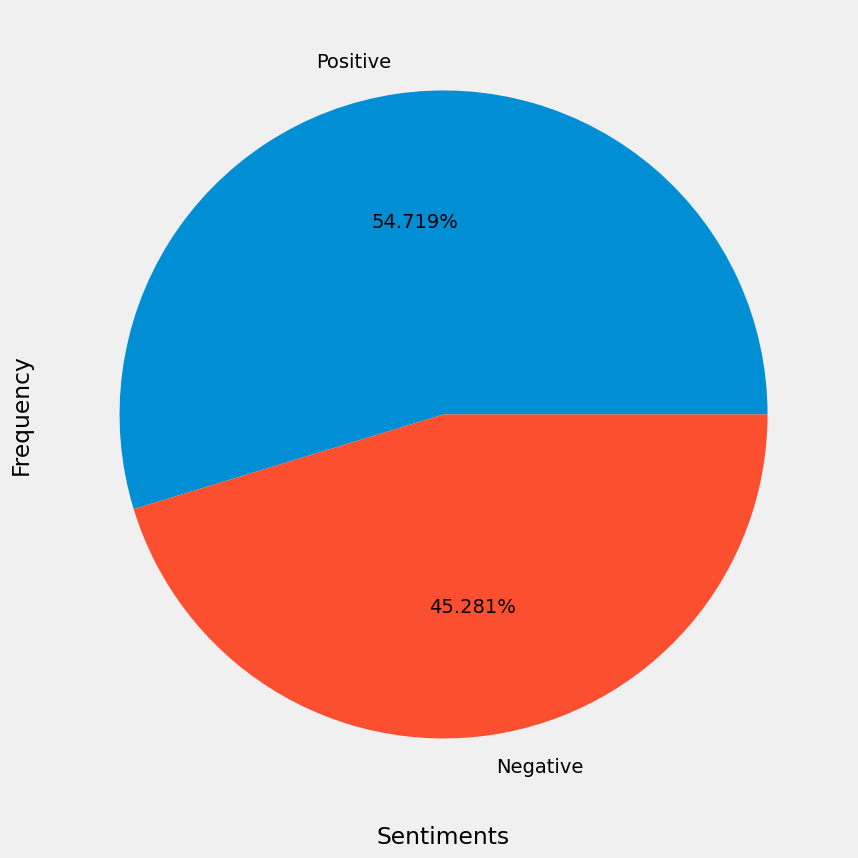

In [9]:
plt.style.use('fivethirtyeight')


# Get summary dictionary for sentiment 
moods_list_all = moods_list_skytrax + moods_list_trustpilot
mood_summary = dict(Counter(moods_list_all))

# Rename dictionary keys before ploting 
mood_summary['Positive'] = mood_summary.pop(1)
mood_summary['Negative'] = mood_summary.pop(0)

fig, ax = plt.subplots()
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.3f%%')

# Change the width and length of plot 
fig.set_figwidth(10)
fig.set_figheight(10)

# Label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
#plt.savefig('Sentiments.png')
plt.show()

# Plot for Frequency of Emotions

- Based on the emotion analysis on the reviews, the words that are the same in both the reviews and the emotions.txt file are placed in a dictionary (data structure)
- The words that are now in the dictionary will be counted (occurance) to get the frequency and plotted


In [10]:
# Testing due to previous issue with the mapping function, corrected and it seems to work
print(temp_emotion_list)

[' happy', ' happy', ' sad', ' happy', ' attached', ' attached', ' happy', ' happy', ' free', ' free', ' happy', ' free', ' sad', ' attracted', ' happy', ' free', ' adequate', ' sad', ' average', ' happy', ' attached', ' happy', ' powerless', ' attracted', ' fearful', ' happy', ' sad', ' anxious', ' lost', ' fearless', ' alone', ' adequate', ' average', ' attached', ' fearful', ' happy', ' entitled', ' loved', ' surprise', ' angry', ' sad', ' demoralized', ' powerless', ' lost', ' attracted', ' demoralized', ' happy', ' attached', ' demoralized', ' free', ' sad', ' happy', ' powerless', ' lost', ' demoralized', ' happy', ' happy', ' free', ' loved', ' angry', ' happy', ' fearful', ' lost', ' sad', ' surprise', ' lost', ' average', ' attached', ' happy', ' adequate', ' free', ' average', ' anxious', ' demoralized', ' sad', ' esteemed', ' demoralized', ' attached', ' happy', ' fearless', ' attracted', ' attached', ' surprise', ' lost', ' cheated', ' happy', ' average', ' sad', ' free', '

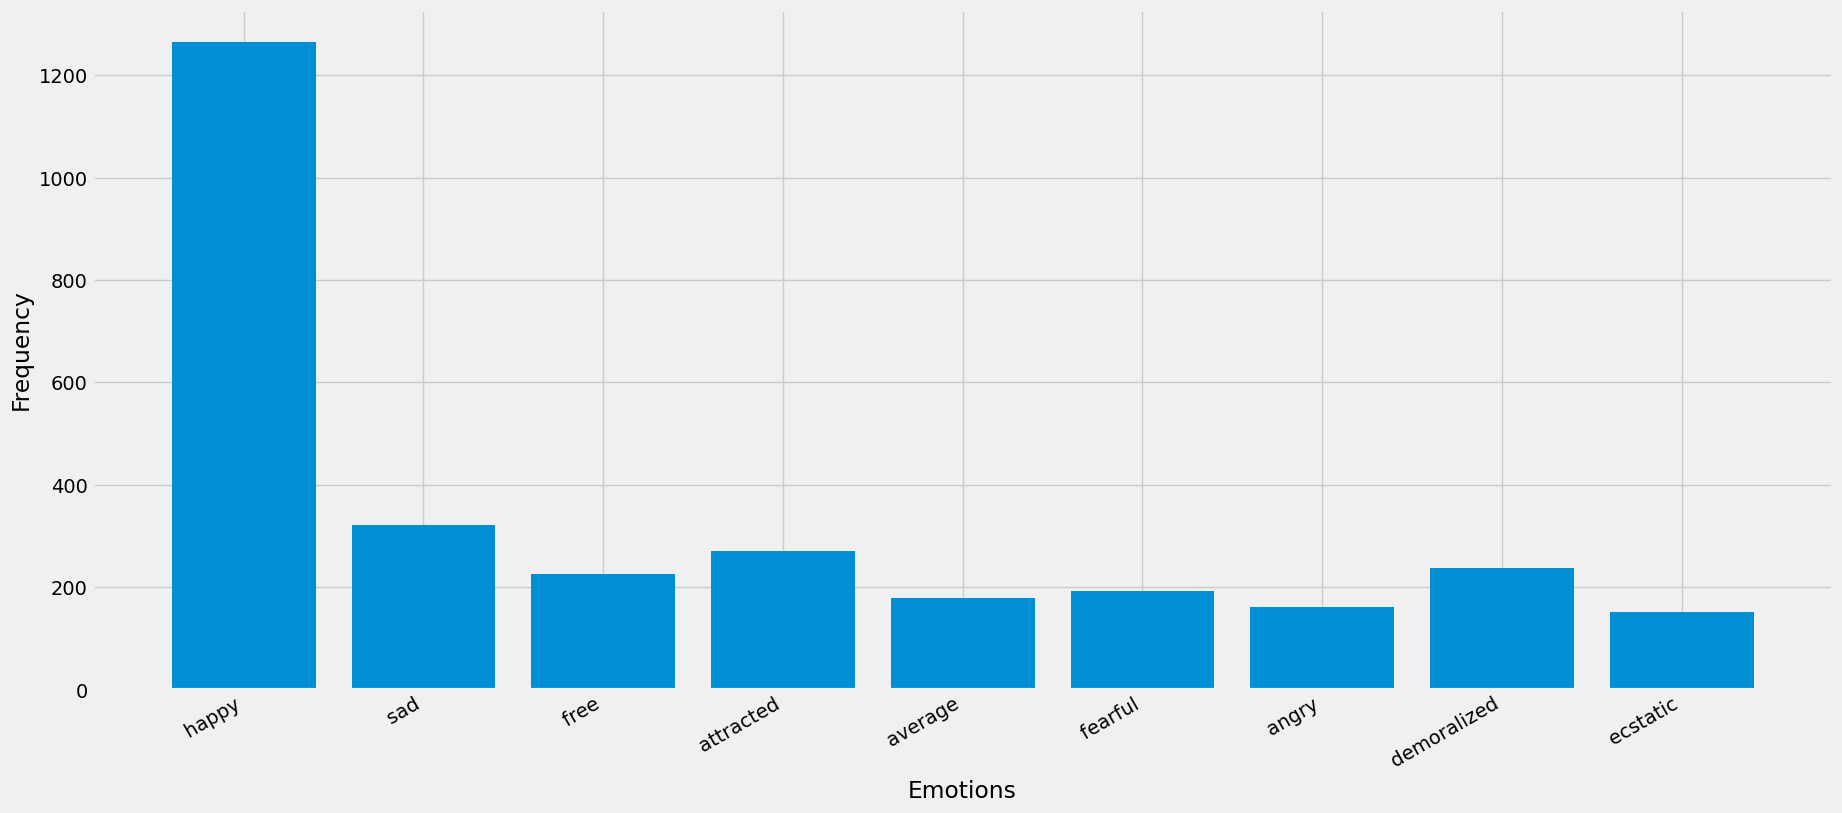

In [11]:
# Turn the temp_emotion_list into dictionary 
words_score_dict = dict(Counter(temp_emotion_list))

# Choose emotions with frequencies more than 150
more_than_150_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 150 )

fig, ax = plt.subplots()

ax.bar(more_than_150_emotions.keys(), more_than_150_emotions.values())

# Fit the text under graph 
fig.autofmt_xdate()

# Change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# Label the plot 
plt.xlabel('Emotions')
plt.ylabel('Frequency')

plt.show()

# WordCloud for the Emotions Present in Bar Plot

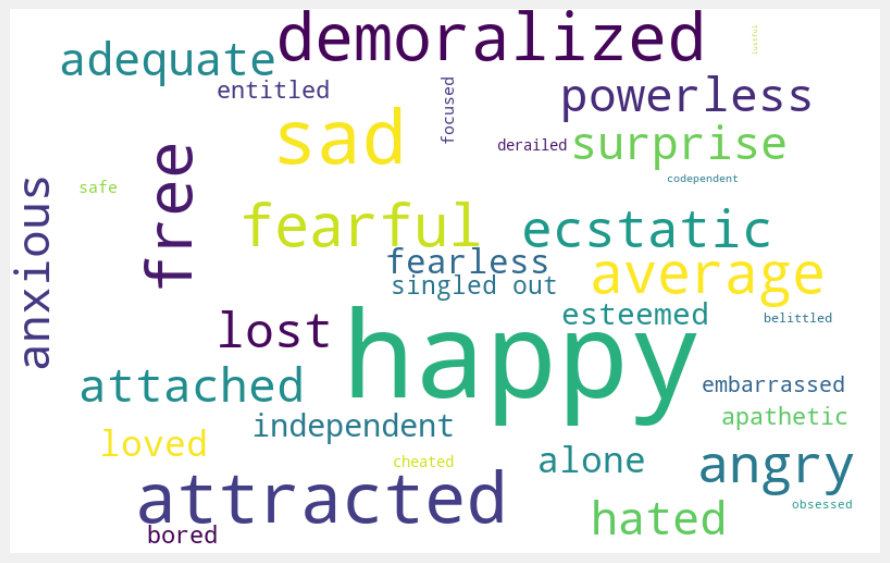

In [12]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Plot For Frequent Categories

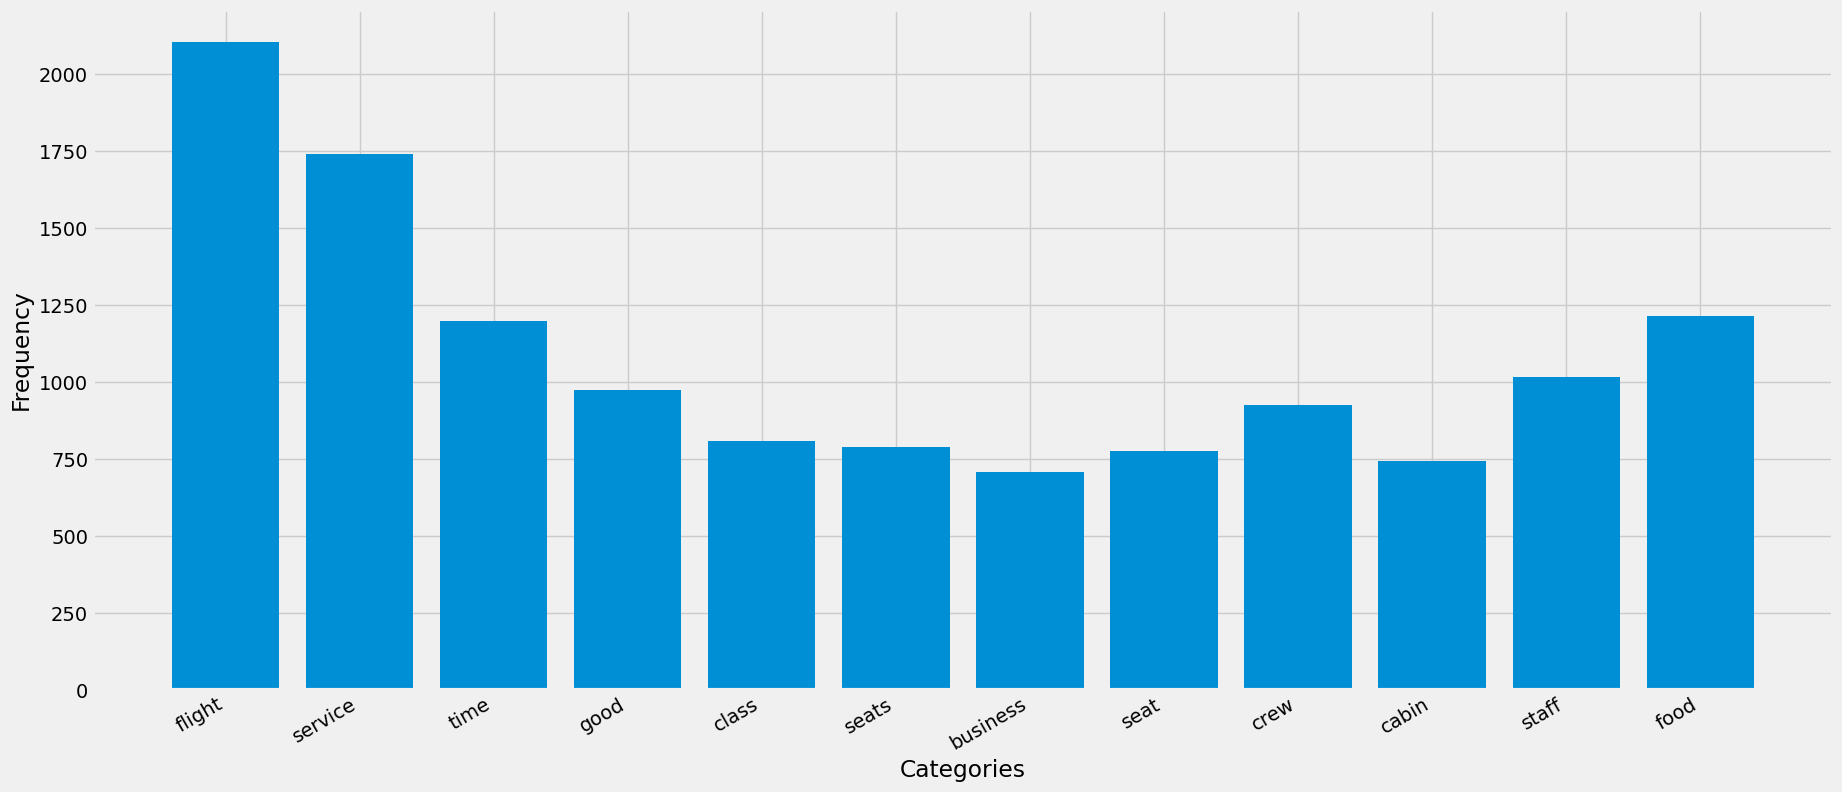

In [13]:
# Turn the emotion list into dictionary 
cat_score_dict = dict(Counter(temp_category_list))

fig, ax = plt.subplots()
ax.bar(cat_score_dict.keys(), cat_score_dict.values())

# Fit the text undre graph 
fig.autofmt_xdate()

# Change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# Label the plot 
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.show()

# Word Cloud for Categories

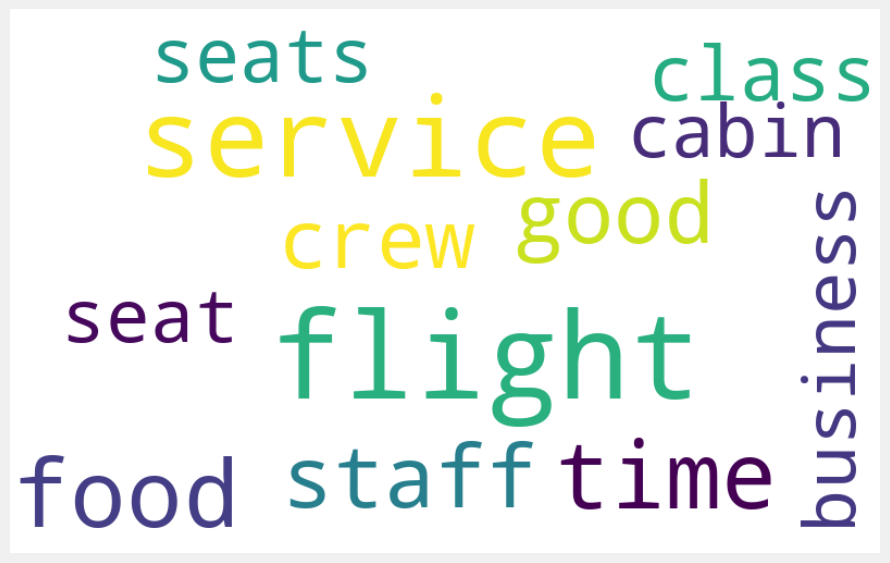

In [14]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Completed